# <center>Government budget in the EU | 2010-2019</center>
---

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [189]:
# Load data
df = pd.read_csv('data/gov_10dd_edpt1_1_Data.csv', usecols=['TIME', 'GEO', 'Value'])

# Create a separate Dataframe with the EU28 average 
eu_avg = df.loc[df['GEO'] == 'European Union - 28 countries (2013-2020)', : ]
                 
# Keep only individual countries
df = df.loc[~df['GEO'].str.lower().str.contains('euro'), : ]

# Remove observations in country names
df['GEO'] = df['GEO'].str.split('(').str[0]

# Show
df.head()

,TIME,GEO,Value
7,2010,Belgium,-4.1
8,2010,Bulgaria,-3.1
9,2010,Czechia,-4.2
10,2010,Denmark,-2.7
11,2010,Germany,-4.4


### Create plot
---

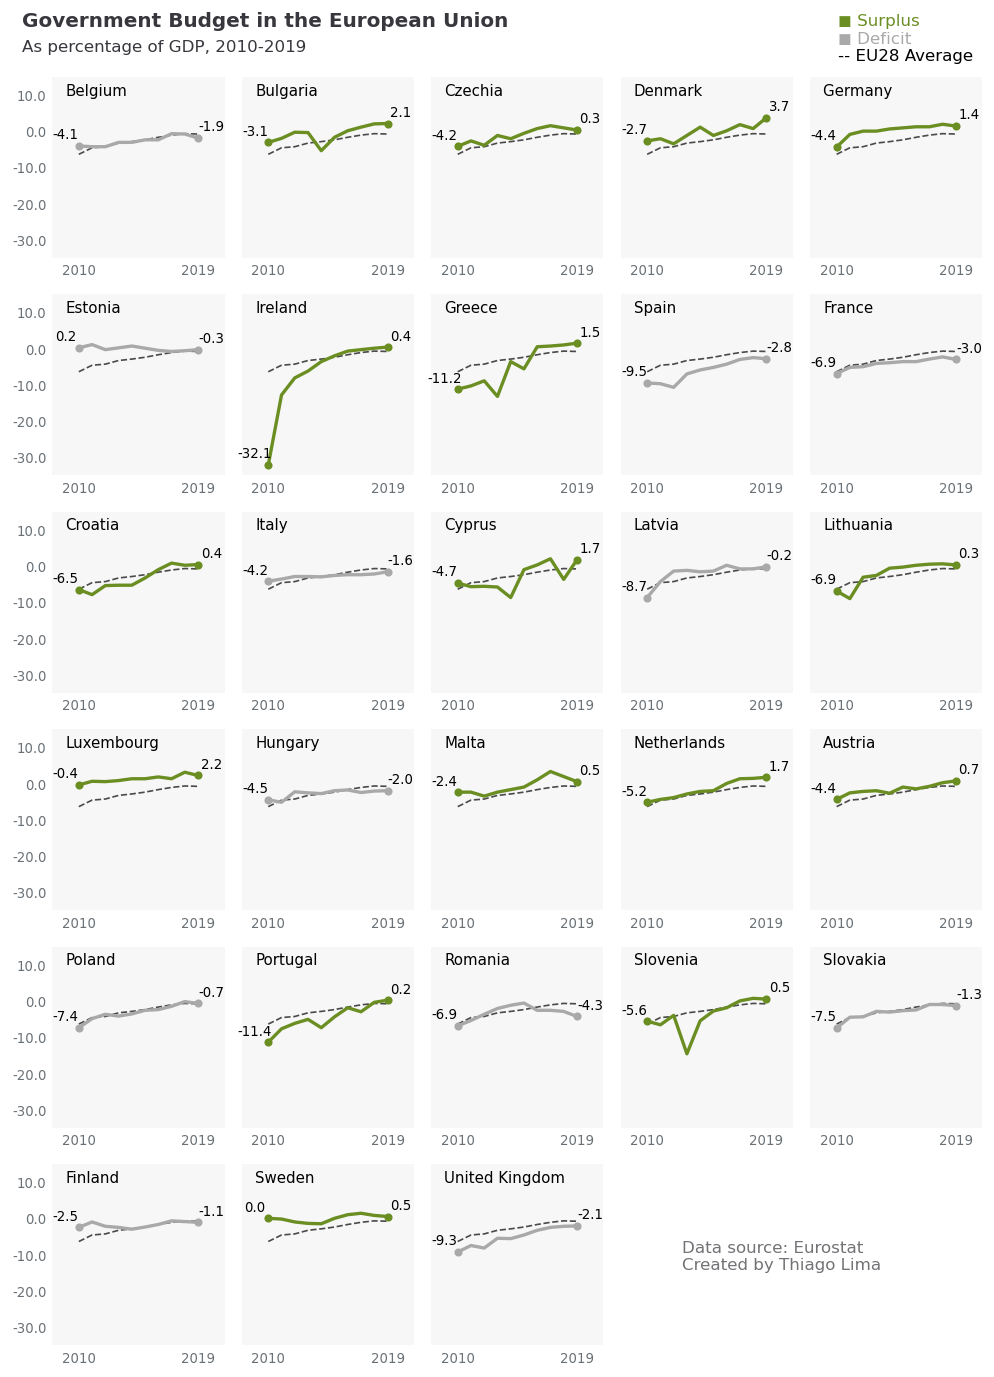

In [260]:
# Basic defaults
plt.rcParams['font.family'] = 'sans-serif'
colors = {'surplus' : '#6b8e23', 'deficit' : '#A9A9A9', 'eu28' : 'k'}

# Define layout
fig, ax = plt.subplots(nrows=6, ncols=5, figsize=(10, 14), dpi=120, sharey=True, facecolor='w')

# loop over each country and position in the grid
countries = df['GEO'].unique()
row = col = 0
for i, country in enumerate(countries):
    cur_ax = ax[row, col]
    view = df.loc[df['GEO'] == country, ['TIME', 'GEO', 'Value']]
    start, end = view['TIME'].min(), view['TIME'].max()
    start_val = view.loc[view['TIME'] == start, 'Value'].max()
    end_val = view.loc[view['TIME'] == end, 'Value'].max()
    status = colors['surplus'] if end_val > 0 else colors['deficit']
    
    cur_ax.plot(view['TIME'], view['Value'], linewidth=2, color=status)
    cur_ax.plot(eu_avg['TIME'], eu_avg['Value'], linestyle='--', linewidth=1, alpha=0.7, color=colors['eu28'], zorder=0) 
    cur_ax.scatter([start, end], [start_val, end_val], s=15, color=status)
    cur_ax.annotate(s=country, xy=(start-1, 10), size=9, ha='left')
    cur_ax.annotate(s=start_val, xy=(start-1, start_val + 2), size=8, ha='center')
    cur_ax.annotate(s=end_val, xy=(end+1, end_val + 2), size=8, ha='center')
    cur_ax.set_xlim(xmin=start-2, xmax=end+2) # Add spaces for labels
    cur_ax.set_ylim(ymin=-35, ymax=15)
    cur_ax.set_yticklabels(cur_ax.get_yticks(), size=8, color='#6a7176')
    cur_ax.set_xticks([2010, 2019])
    cur_ax.set_xticklabels([2010, 2019], size=8, color='#6a7176')
    cur_ax.set_facecolor('#f7f7f7')
    cur_ax.tick_params(axis='both',which='both',length=0)

    for spine in cur_ax.spines:
        cur_ax.spines[spine].set_visible(False)
    if col == 4:
        row += 1
        col = 0
    else:
        col += 1

# Hide remaining axes
ax[5, -2].axis(False)
ax[5, -1].axis(False)

# Title, subtitle, legend and footnote
fig.text(x =0.1, y= 0.91, 
         s = 'Government Budget in the European Union', 
         color='#37373d', size=12, weight='bold' )
fig.text(x =0.1, y= 0.895, 
         s = 'As percentage of GDP, {}-{}'.format(df['TIME'].min(), df['TIME'].max()), 
         color='#37373d', size=10)
fig.text(x =0.78, y= 0.9, s = '◼ Surplus\n', color=colors['surplus'], size=10, ha='left')
fig.text(x =0.78, y= 0.9, s = '◼ Deficit', color=colors['deficit'], size=10, ha='left')
fig.text(x =0.78, y= 0.89, s = '-- EU28 Average', color=colors['eu28'], size=10, ha='left')

fig.text(x =0.65, y= 0.17, 
         s = 'Data source: Eurostat\nCreated by Thiago Lima', 
         color='#37373d', size=10, alpha=0.7 )

# Add space between plots
fig.subplots_adjust(wspace=0.1, hspace=0.2)

fig.savefig('government-budget-in-the-eu.png', facecolor=fig.get_facecolor(), edgecolor='none', bbox_inches='tight')